<a href="https://colab.research.google.com/github/saciva-team-2b/Saciva-University-Recommendation-System-2B/blob/main/Saciva_University_Recommendation_System_2B_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the Dataset**

Load the CSV file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
final_df = pd.read_csv("/content/drive/MyDrive/datasets/final_df.csv")

# **Modeling**

## Standardize the Data (for KNN or Gradient Descent)

Let's scale the numerical data to normalize each column to have zero mean and unit standard deviation.

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Step 1: Select and scale the features
final_features = [
    'overall_score', 'teaching_score', 'research_score', 'citations_score',
    'industry_income_score', 'international_outlook_score', 'tuition',
    'student_to_faculty_ratio', 'admission_rate', 'STEM', 'Education',
    'Business', 'Health', 'cost_index', 'crimes'
]  # Exclude 'institute_name'

# Ensure your `final_df` contains only the relevant features
features = final_df[final_features]

# Standardize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[ 2.72727279,  3.03956736,  2.94378022, ..., -0.31038235,
         1.37104477,  1.60484708],
       [ 2.70405629,  3.00597303,  2.84096774, ..., -0.31038235,
         2.28564059,  3.61212585],
       [ 2.66923154,  2.8100061 ,  2.7023944 , ..., -0.31038235,
         1.37104477, -0.67368558],
       ...,
       [-1.38785176, -0.99735132, -0.80217006, ..., -0.31038235,
        -0.8592854 , -0.45668247],
       [ 0.02097187,  0.02221421,  0.02247542, ..., -0.31038235,
        -0.93416459, -1.01727384],
       [ 0.02097187,  0.02221421,  0.02247542, ..., -0.31038235,
        -1.40483379,  0.35707919]])

In [7]:
# Step 2: Define identifiers for universities
identifiers = final_df['institute_name']

# Step 3: Initialize and fit the KNN model
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn.fit(features_scaled)

# Step 4: Define the recommendation function
def recommend_universities(student_input, model, data, identifiers):
    """
    Recommend top 10 universities based on student input.

    Args:
        student_input (array): A single student's feature vector.
        model (NearestNeighbors): Trained KNN model.
        data (DataFrame): Standardized feature data used for KNN.
        identifiers (Series): University names corresponding to feature data.

    Returns:
        DataFrame: Top 10 recommended universities and their distances.
    """
    # Reshape input for a single sample
    distances, indices = model.kneighbors(student_input.reshape(1, -1))
    recommended = pd.DataFrame({
        "institute_name": identifiers.iloc[indices[0]].values,
        "distance": distances[0]
    })
    return recommended

# Step 5: Simulate a student's input
student_input = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, -1, -1, 1, 0, 1])

# Step 6: Get recommendations
recommendations = recommend_universities(student_input, knn, features_scaled, identifiers)
print("Recommended Universities:")
print(recommendations)


Recommended Universities:
                         institute_name  distance
0                   syracuse_university  2.640197
1             michigan_state_university  2.778680
2                    university_of_iowa  2.809530
3         university_of_nebraskalincoln  2.847532
4  the_university_of_tennesseeknoxville  2.875218
5                  university_of_kansas  2.924137
6        university_of_illinois_chicago  2.932159
7  university_of_south_carolinacolumbia  3.007844
8               george_mason_university  3.042364
9              west_virginia_university  3.145217


# **Evaluation**

In order to be able to show the clusters on the map, we need to reduce the dimensionality of the feature space to have two dimensions for visualization

For this task, we will be doing PCA

**1. Implementing the PCA**

In [9]:
from sklearn.preprocessing import StandardScaler

# Define weights for features
weights = {
    "cost_index": 2.0,
    "overall_score": 3.0,
    "teaching_score": 2.0,
    "crimes": 0.5
}

# Apply weights to features
weighted_features = features.copy()
for col, weight in weights.items():
    if col in weighted_features.columns:
        weighted_features[col] *= weight

# Standardize weighted features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(weighted_features)

features_scaled

array([[ 2.72727279,  3.03956736,  2.94378022, ..., -0.31038235,
         1.37104477,  1.60484708],
       [ 2.70405629,  3.00597303,  2.84096774, ..., -0.31038235,
         2.28564059,  3.61212585],
       [ 2.66923154,  2.8100061 ,  2.7023944 , ..., -0.31038235,
         1.37104477, -0.67368558],
       ...,
       [-1.38785176, -0.99735132, -0.80217006, ..., -0.31038235,
        -0.8592854 , -0.45668247],
       [ 0.02097187,  0.02221421,  0.02247542, ..., -0.31038235,
        -0.93416459, -1.01727384],
       [ 0.02097187,  0.02221421,  0.02247542, ..., -0.31038235,
        -1.40483379,  0.35707919]])

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE

# Perform PCA
pca = PCA(n_components=2)
reduced_features_pca = pca.fit_transform(features_scaled)

# Create PCA DataFrame
reduced_df_pca = pd.DataFrame(reduced_features_pca, columns=["PCA1", "PCA2"])
reduced_df_pca["institute_name"] = identifiers.values  # Add university names


# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_features_tsne = tsne.fit_transform(features_scaled)

# Create t-SNE DataFrame
reduced_df_tsne = pd.DataFrame(reduced_features_tsne, columns=["t-SNE1", "t-SNE2"])
reduced_df_tsne["institute_name"] = identifiers.values  # Add university names

# Fit KMeans to scaled data
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add clusters to DataFrame for visualization
reduced_df_pca["cluster"] = cluster_labels
reduced_df_tsne["cluster"] = cluster_labels


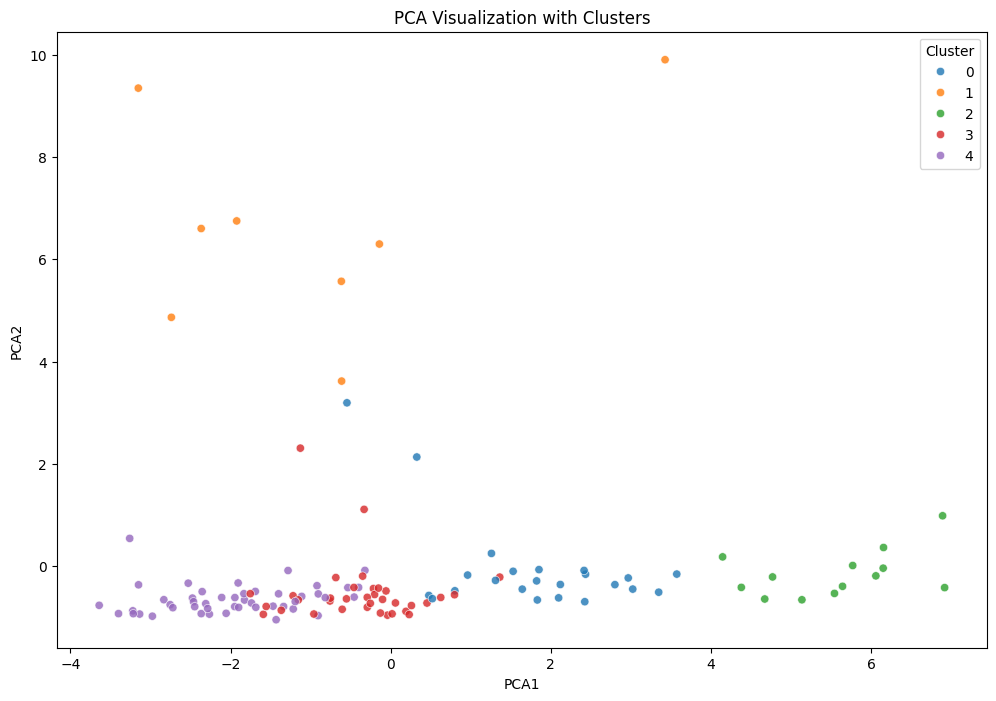

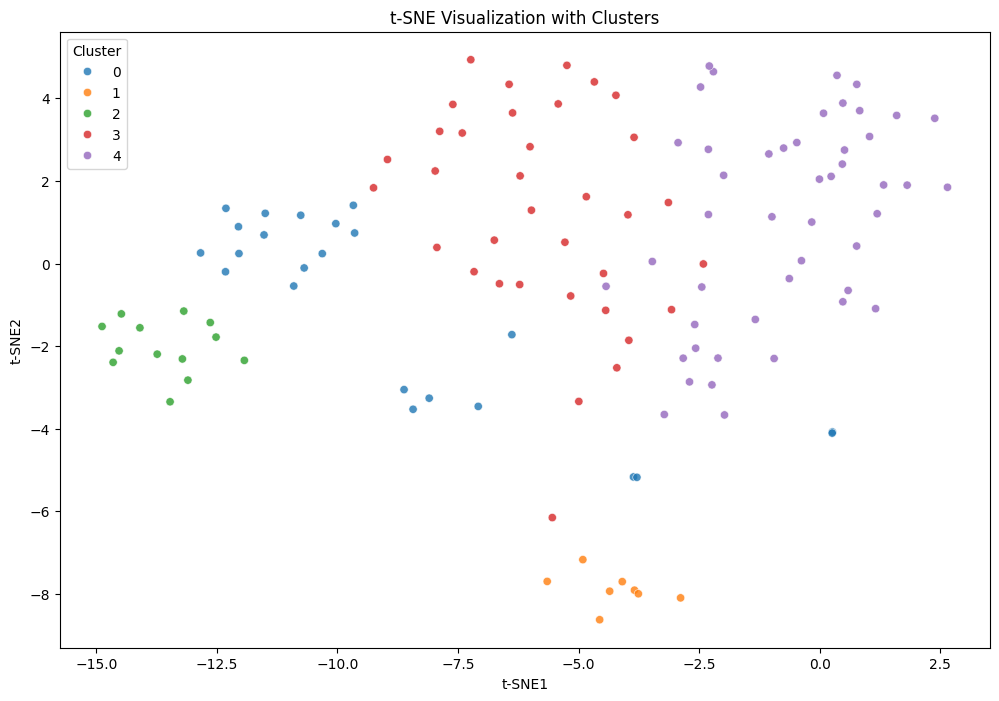

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# PCA Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=reduced_df_pca, palette="tab10", alpha=0.8)
plt.title("PCA Visualization with Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# t-SNE Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="cluster", data=reduced_df_tsne, palette="tab10", alpha=0.8)
plt.title("t-SNE Visualization with Clusters")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster")
plt.show()


In [19]:
import numpy as np

# Simulate student preferences (adjust these values)
student_input = np.zeros(features_scaled.shape[1])
student_input[features.columns.get_loc("cost_index")] = -1.0  # Low cost preference
student_input[features.columns.get_loc("teaching_score")] = 1.0  # High teaching score preference

# Convert student_input to a DataFrame with the same column names
student_input_df = pd.DataFrame([student_input], columns=features.columns)

# Scale input
student_input_scaled = scaler.transform(student_input_df)
student_input_scaled

array([[ -2.7982541 ,  -2.24034153,  -1.48162643,  -3.11178767,
         -3.71257302,  -3.12348209,  -2.52244186,  -2.80767311,
         -1.87257418,  -0.24664617,  -0.23408229,  -0.28591897,
         -0.31038235, -10.37970645,  -1.01727384]])

In [22]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric="euclidean")
knn.fit(features_scaled)

# Get recommendations
distances, indices = knn.kneighbors(student_input_scaled)
recommended_universities = identifiers.iloc[indices[0]].tolist()

# Display recommended universities
print("Recommended Universities:")
print(recommended_universities)


Recommended Universities:
['grand_valley_state_university', 'western_michigan_university', 'university_of_north_carolina_wilmington', 'mississippi_state_university', 'northern_illinois_university', 'university_of_missourist_louis', 'oakland_university', 'university_of_memphis', 'university_of_south_dakota', 'university_of_north_carolina_at_greensboro']


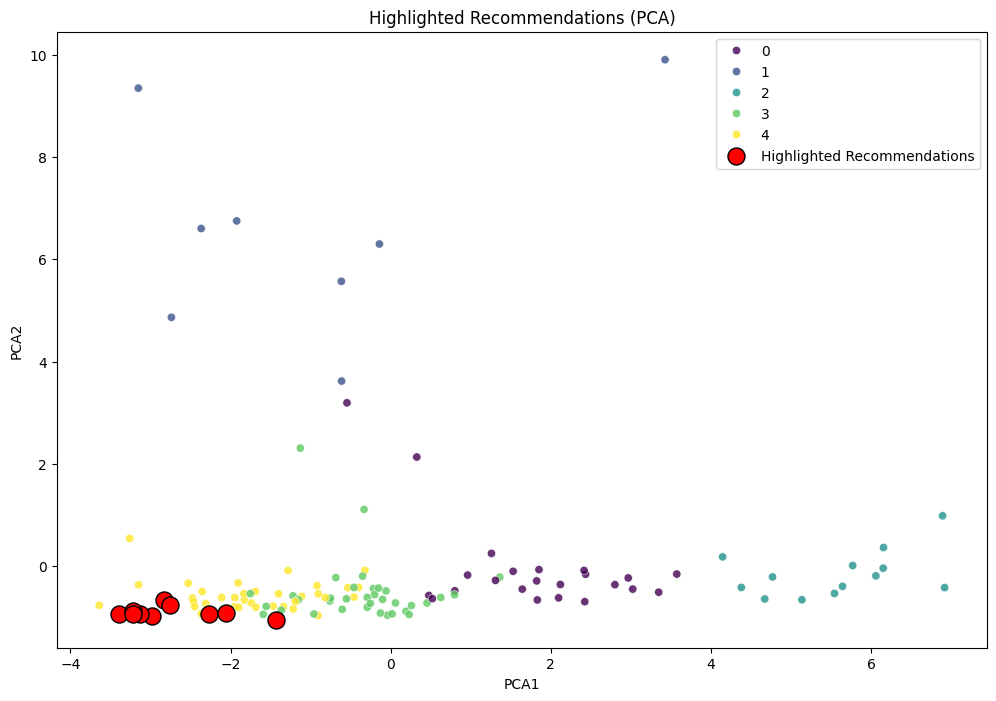

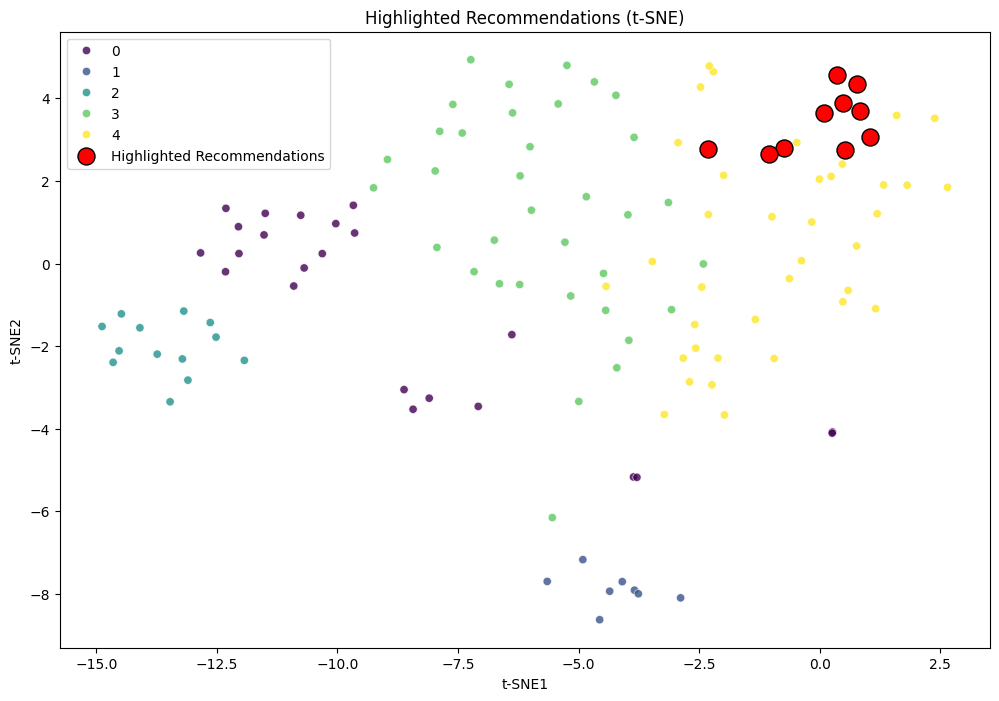

In [14]:
# Highlight in PCA plot
highlighted_points_pca = reduced_df_pca[reduced_df_pca["institute_name"].isin(recommended_universities)]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="cluster", data=reduced_df_pca, palette="viridis", alpha=0.8
)
plt.scatter(
    highlighted_points_pca["PCA1"],
    highlighted_points_pca["PCA2"],
    color="red", s=150, edgecolor="black", label="Highlighted Recommendations"
)
plt.title("Highlighted Recommendations (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

# Highlight in t-SNE plot
highlighted_points_tsne = reduced_df_tsne[reduced_df_tsne["institute_name"].isin(recommended_universities)]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="t-SNE1", y="t-SNE2", hue="cluster", data=reduced_df_tsne, palette="viridis", alpha=0.8
)
plt.scatter(
    highlighted_points_tsne["t-SNE1"],
    highlighted_points_tsne["t-SNE2"],
    color="red", s=150, edgecolor="black", label="Highlighted Recommendations"
)
plt.title("Highlighted Recommendations (t-SNE)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()